# Project Motivation and Business Understanding

* Where does the best wine in the world come from?
* Is price related to quality?
* Are certain varieties of wine higher quality?
* What words are most used when talking about wine?

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Data Meaning
* unnamed: This is just an index column which can be removed
* country: This is the country where the wine was made
* description: This is a description of the wine
* designation: This is the vineyard within the winery where the grapes that made the wine are from
* points: This is the number of points the wine was scored in the review
* price: This is the price of the bottle of wine
* province: This is the province or state where the wine was made
* region_1: This is the region where the wine was made
* region_2: Sometimes there are more specific regions specified within a wine growing area. It looks like we can remove this
* taster_name: This is the name of the reviewer
* taster_twitter_handle: This is the Twitter account that made the review
* title: This is the name of the wine being reviewed. Interestingly the year is included here.
* variety: This is the type of grapes used to make the wine
* winery: This is the winery where the wine was made

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Here we see the range of points given to a bottle of wine. The minimum is 80 and the max is 100. After a quick google this seems to be a reasonable scale. Using the link here:https://www.wine-searcher.com/critics-17-wine+enthusiast I found that the Wine Enthusiast rates as below:

* 98–100 – Classic
* 94–97 – Superb
* 90–93 – Excellent
* 87–89 – Very good
* 83–86 – Good
* 80–82 – Acceptable

We also see that the minimum price for a bottle of wine is $4. I know the price is in dollars from checking out the Wine Enthuasiast blog where this data was scraped from, the link is here: https://www.winemag.com/?s=&drink_type=wine

In [6]:
df.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

We could see that most of the reviews are from the area of US, France, Italy which isn't too surprising as these countries are known for their wine productions

In [7]:
df.duplicated().sum()

0

* 'Unnamed: 0', 'region_2', ''taster_name','taster_twitter_handle', 'designation' columns don't add anything useful to my analysis so could be dropped
* Missing values in 'country', 'price', 'province', 'variety', 'region_1'
* Title column has the year in it so could be made into a separate column

# Cleaning the Data

In [8]:
df1 = df.copy()

In [9]:
df1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1,inplace=True)

In [10]:
df1

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [11]:
df1.isnull().sum()

country           63
description        0
points             0
price           8996
province          63
region_1       21247
title              0
variety            1
winery             0
dtype: int64

In [12]:
df1.dropna(subset=['country','price','province','variety'])

,country,description,points,price,province,region_1,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


* Missing values in columns 'country','price','province','variety' are removed, as the data is quite big, there will not be a big affect to it.

# Explolatory Data Analysis

## 1. Where does the best wine come from?

First, let's see which countries produce the most wine

In [13]:
df1['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Text(0, 0.5, 'Number of Ratings')

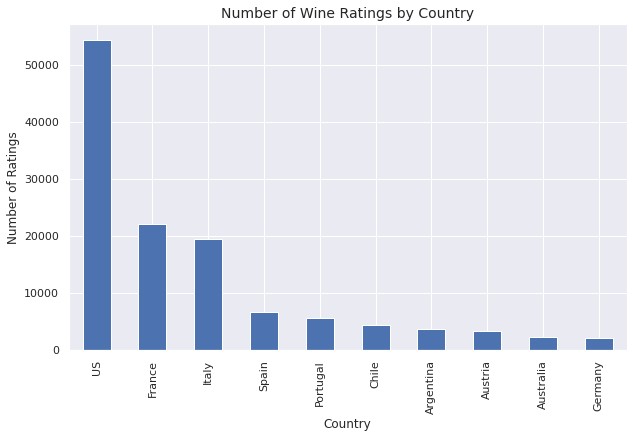

In [14]:
country_ranking = df1['country'].value_counts()[:10]
plt.figure(figsize=(10,6))
country_ranking.plot(kind='bar')
plt.title('Number of Wine Ratings by Country', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Number of Ratings')

Next, we look at the distribution of points of the wines

Text(0, 0.5, 'Count')

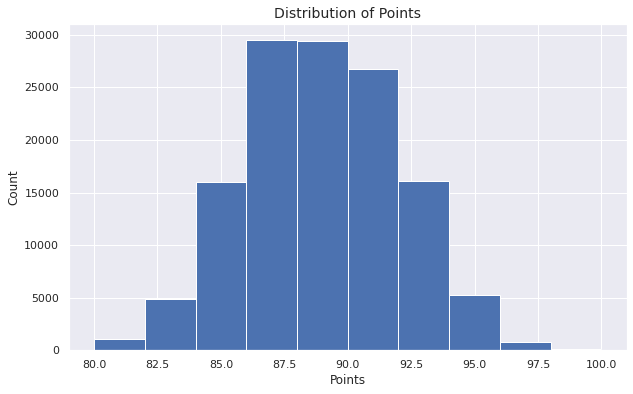

In [15]:
plt.figure(figsize=(10,6))
df['points'].plot(kind='hist')
plt.title('Distribution of Points', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Count')

We could see that most of the wine are given points between the range 85 to 92

Now let's look at which country has produced the wine with best overall points

In [16]:
mean_points_by_country = df.groupby('country')['points'].mean()
mean_points_by_country.sort_values(inplace=True,ascending=False)
mean_points_by_country

country
England                   91.581081
India                     90.222222
Austria                   90.101345
Germany                   89.851732
Canada                    89.369650
Hungary                   89.191781
China                     89.000000
France                    88.845109
Luxembourg                88.666667
Australia                 88.580507
Switzerland               88.571429
Morocco                   88.571429
US                        88.563720
Italy                     88.562231
Israel                    88.471287
New Zealand               88.303030
Portugal                  88.250220
Turkey                    88.088889
Slovenia                  88.068966
South Africa              88.056388
Bulgaria                  87.936170
Georgia                   87.686047
Lebanon                   87.685714
Armenia                   87.500000
Serbia                    87.500000
Spain                     87.288337
Greece                    87.283262
Czech Republic      

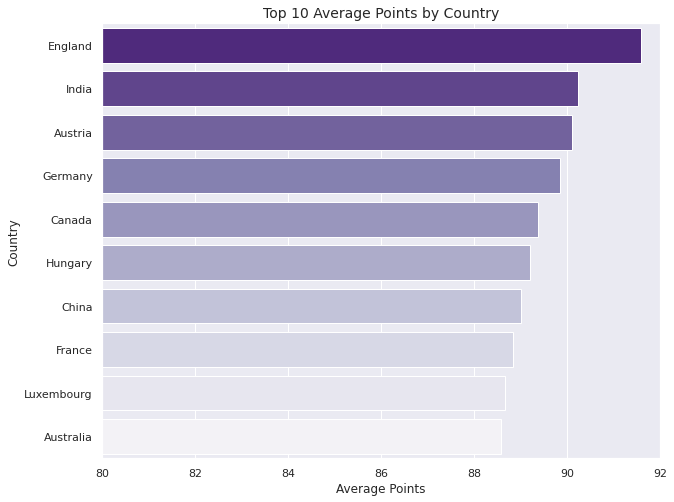

In [17]:
top10_mean_points_by_country = mean_points_by_country[:10]
plt.figure(figsize=(10,8))
plt.xlim(80, 92)
sns.barplot(x=top10_mean_points_by_country.values, y=top10_mean_points_by_country.index, palette='Purples_r')
plt.title('Top 10 Average Points by Country', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

It's surprisingly that england has the best average points of wine. However, it may not be accurate because the average points could also be affected by the number of reviews and England has only total 74 reviews out of 120000++ reviews. It is worth investigating thi furtherm let's look at those with score over 95, i.e the superb wines according to the Wine Enthusiast Rating System

In [18]:
high_scorers = df1[df1['points']>=95]
high_scorers.country.value_counts()

US              993
France          665
Italy           346
Austria         117
Portugal        106
Germany          65
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: country, dtype: int64

In [19]:
# number of wines from each country in the dataset
df1.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

As shown from above, the countries which achieved a rating of 95-100 points for their wines differ from our plot of the highest scorers based on their means. A barplot will allow us to see the max, min and mean scored by each country in the dataset which should paint a clearer picture of which countries score the highest points. Since this dataset contains more US wines it is likely that there will be a broad range of wines from the country whereas England which received the best average score has fewer wines in the dataset which is an unfair comparison.

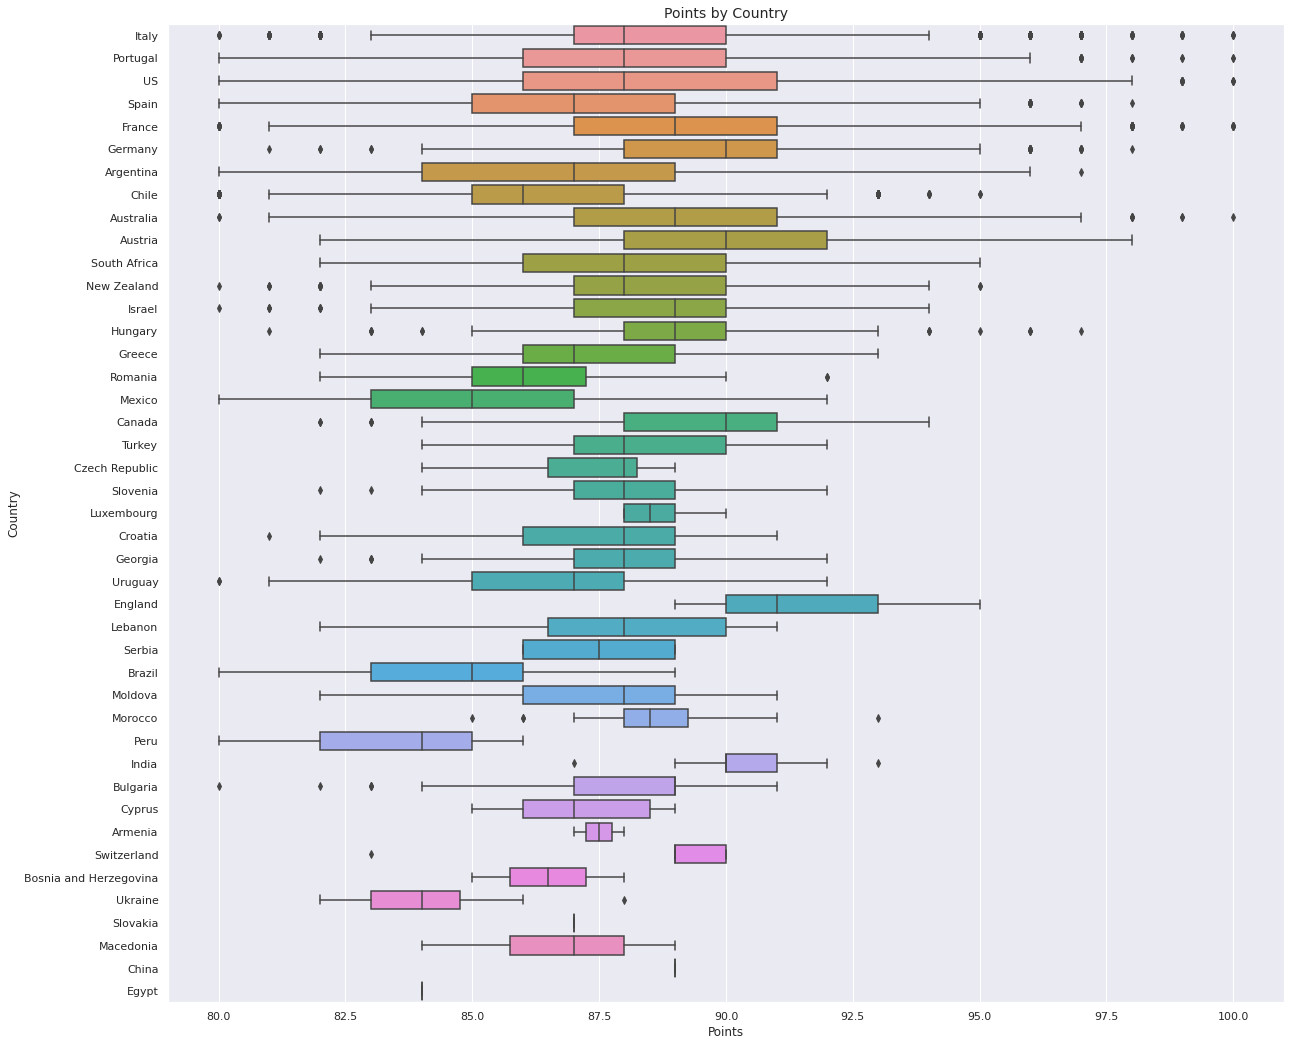

In [20]:
plt.figure(figsize=(20,18))
# base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'points', y = 'country')
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

As shown in the boxplot above, although England has the best average scores wine, wines from Italy, US, Portugal, France, Australia had produced wine which has perfect score 100. This dataset consist more reviews from these countries, therefore, they have the wider range of scores.


We have seen the average points of wine produced by each country, now we will investigate the average price of wine from each country

In [21]:
average_price_by_country = df1.groupby('country')['price'].mean()
average_price_by_country = average_price_by_country.sort_values(ascending=False)
average_price_by_country

country
Switzerland               85.285714
England                   51.681159
Germany                   42.257547
France                    41.139120
Hungary                   40.648276
Italy                     39.663770
US                        36.573464
Canada                    35.712598
Australia                 35.437663
Israel                    31.768916
Austria                   30.762772
Lebanon                   30.685714
Spain                     28.215275
New Zealand               26.931785
Mexico                    26.785714
Uruguay                   26.403670
Portugal                  26.218256
Croatia                   25.450704
Slovenia                  24.812500
South Africa              24.668987
Turkey                    24.633333
Argentina                 24.510117
Serbia                    24.500000
Czech Republic            24.250000
Brazil                    23.765957
Luxembourg                23.333333
Greece                    22.364425
Chile               

Text(0, 0.5, 'Country')

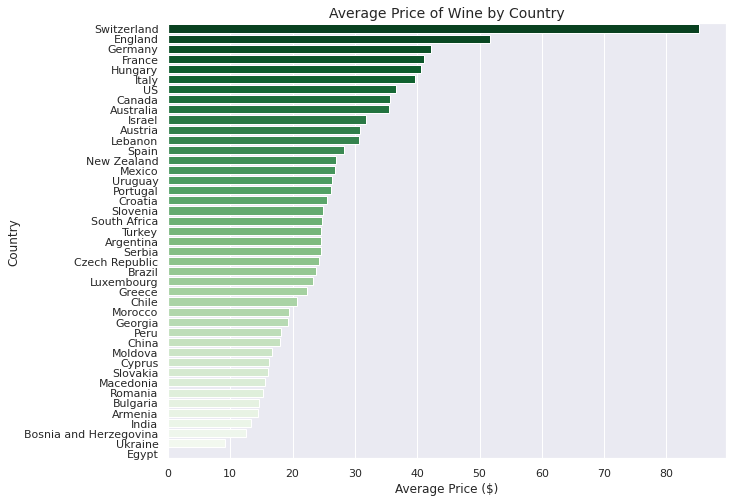

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x=average_price_by_country.values, y=average_price_by_country.index, palette='Greens_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country')

Wine from switzerland is the most expensive, with the average price of 85, while Ukraine has the cheapest wine with price around 9.2

# 2. Is price related to quality?

First let's look at the distribution of wine prices

Text(0, 0.5, 'Frequency')

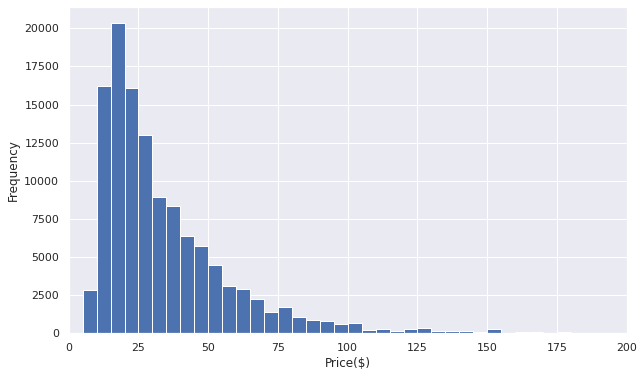

In [23]:
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, df1['price'].max()+5, 5)
plt.hist(data=df1,x='price',bins=bin_edges)
plt.xlim(0,200)
plt.xlabel('Price($)')
plt.ylabel('Frequency')

Since the distribution is right skewed, to better understand the distribution, log transformation will be applied

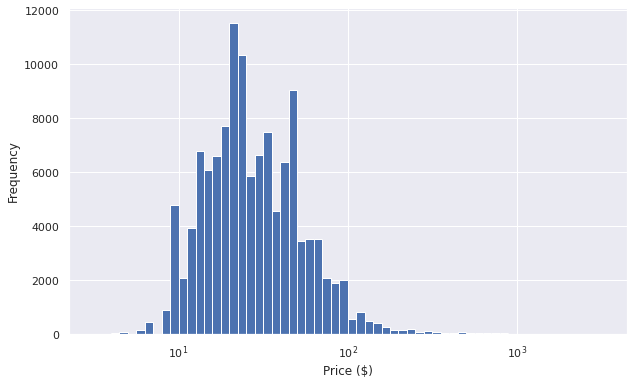

In [24]:
# plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
# ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = df1, x = 'price', bins=bin_edges)
plt.xscale('log')
# plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

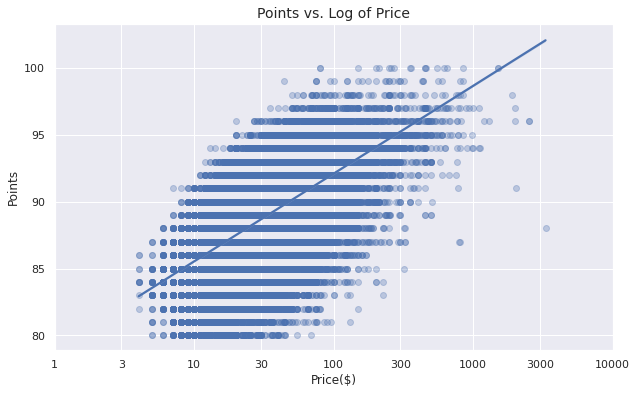

In [25]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df1, logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

As shown in the scatter plot above, Price does have linear relationship with points. As the price increase, the points of wine does increase.

# 3. Are ceratin varites of wine higher quality

In [26]:
df1.variety.value_counts()[:10]

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [27]:
# high_scorers_variety = df1[df1['points']>95]
top_variety = df1.groupby('variety')['points'].mean()
top_10_variety = top_variety.sort_values(ascending=False)[:10]
top_10_variety =top_10_variety.reset_index()

In [28]:
top_10_variety

,variety,points
0,Terrantez,95.000000
1,Tinta del Pais,95.000000
2,Gelber Traminer,95.000000
3,Bual,94.142857
4,Sercial,94.000000
5,Riesling-Chardonnay,94.000000
6,Ramisco,93.000000
7,Garnacha-Cariñena,93.000000
8,Blauburgunder,93.000000
9,Muscadelle,92.500000


In [29]:
df1.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

In [30]:
df1[df1.variety == 'Terrantez']['points']

31417    95
Name: points, dtype: int64

In [31]:
df1[df1.variety == 'Pinot Noir']['points']

4         87
21        87
25        87
35        86
41        86
          ..
129920    91
129931    91
129936    91
129960    90
129967    90
Name: points, Length: 13272, dtype: int64

Although the average scores of Terrantez is the highest, we can see that there is only 1 review from Terrantez. Thus, to see a better results, we will look at the range and median of box plot to decide which variety has the best points overall

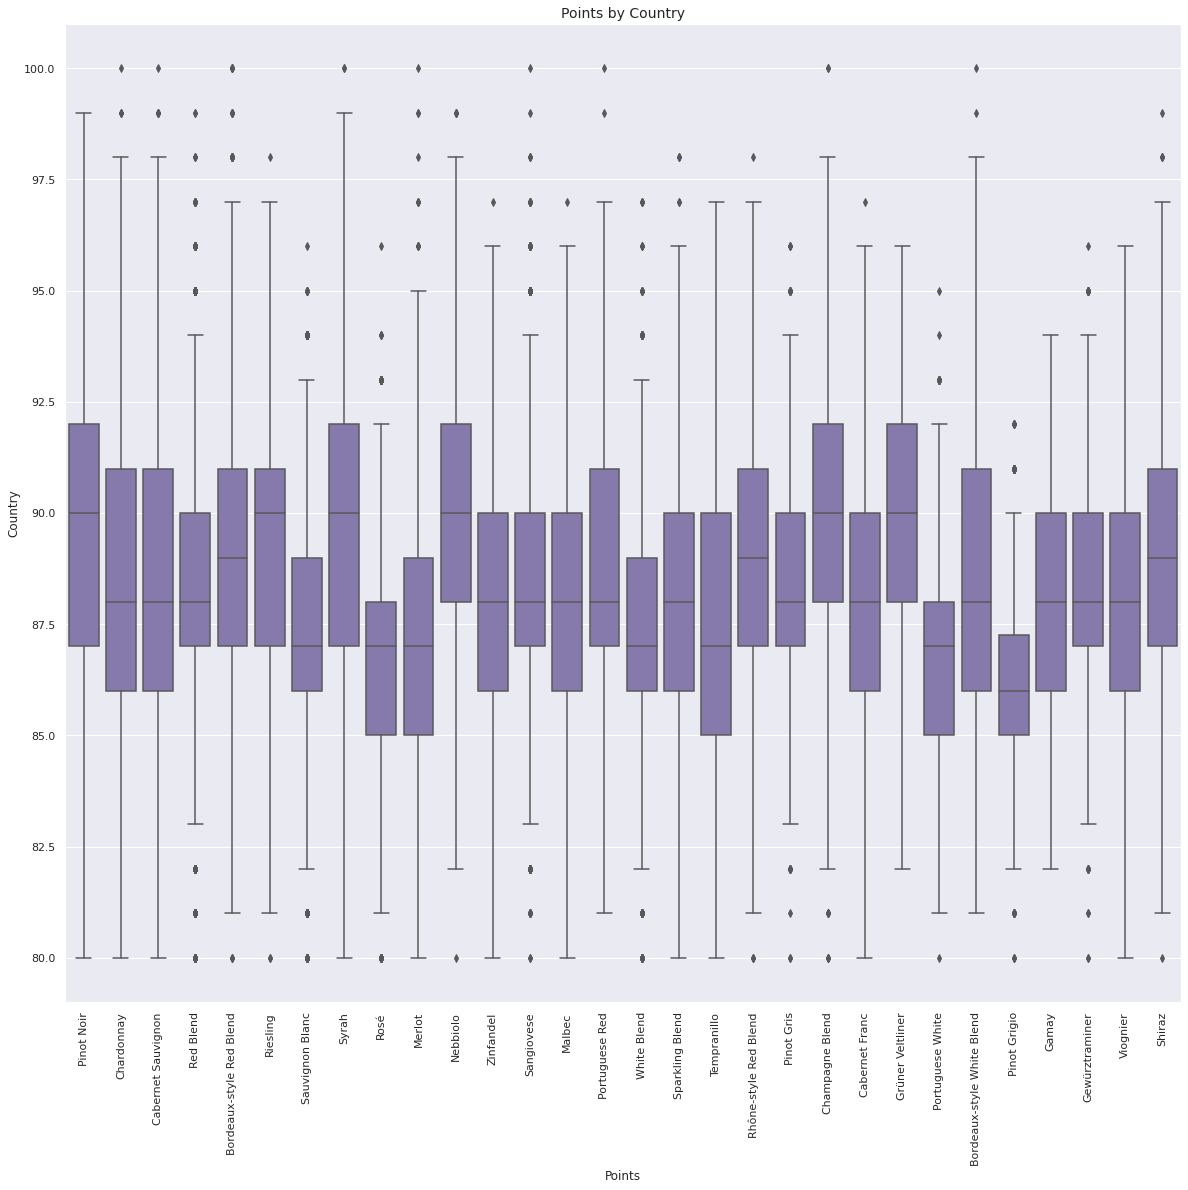

In [32]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'variety', y = 'points', color = base_color, order = df1.variety.value_counts().iloc[:30].index)

plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()

When plotting the top 20 most popular wines in the dataset, we can see that pinor noir tends to perform the best where the median is higher compare to the others.

# Points of wine in each price bracket

In [33]:
df1.price.describe() 

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

Although the price of wines range between 4 to 3300, but it's a right skewed distribution, we will only set the price bracket as following:
1. 0 - 10
2. 10 - 20
3. 20 - 30
4. 40 - 50
5. 50 and above

In [34]:
below_10 = df1.query("price < 10")
print(len(below_10))
below_20 = df1.query("price >= 10 and price < 20")
print(len(below_20))
below_30 = df1.query("price >= 20 and price < 30")
print(len(below_30))
below_40 = df1.query("price >= 30 and price < 40")
print(len(below_40))
below_50 = df1.query("price >= 40 and price < 50")
print(len(below_50))
above_50 = df1.query("price >= 50")
print(len(above_50))

2841
36560
29103
17299
12064
23108


In [35]:
average_points_of_each_bracket = [below_10.points.mean(),
                                 below_20.points.mean(),
                                 below_30.points.mean(),
                                 below_40.points.mean(),
                                 below_50.points.mean(),
                                 above_50.points.mean()]
price_bracket = ['<10','<20','<30','<40','<50','>50']

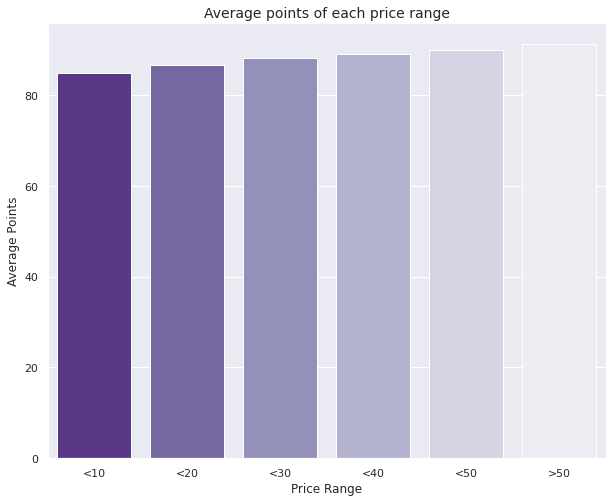

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x=price_bracket, y=average_points_of_each_bracket, palette='Purples_r')
plt.title('Average points of each price range', fontsize = 14)
plt.xlabel('Price Range')
plt.ylabel('Average Points');

From the bar plots above, we can see that the points do increase as the price increase 

# What words are most used when describing wine?

In [37]:
text= " ".join(review for review in df1.description)
print(f"There are total {len(text)} words in the reviews description")

There are total 31661073 words in the reviews description


In [38]:
from wordcloud import WordCloud 
import gensim
from collections import defaultdict
import random
import re
import string

gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS  
stopwords = list(set(gensim_stopwords))          

# Remove stopwords from the articles
def remove_stopwords(tweets,stopwords):
    tweets_lists = []
    for text in tweets:

        lst=[]
        for token in text.split():
            if token.lower() not in stopwords:    #checking whether the word is not 
                lst.append(token)                    #present in the stopword list.
            
        tweets_lists.append(' '.join(lst))
            
    return tweets_lists

def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

processed_words = remove_stopwords(df1.description,stopwords)

processed_words = list(map(clean_text,processed_words))
processed_words

['aromas include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity',
 'ripe fruity wine smooth structured firm tannins filled juicy red berry fruits freshened acidity its drinkable certainly better ',
 'tart snappy flavors lime flesh rind dominate green pineapple pokes through crisp acidity underscoring flavors wine stainlesssteel fermented',
 'pineapple rind lemon pith orange blossom start aromas palate bit opulent notes honeydrizzled guava mango giving way slightly astringent semidry finish',
 'like regular bottling  comes rough tannic rustic earthy herbal characteristics nonetheless think pleasantly unfussy country wine its good companion hearty winter stew',
 'blackberry raspberry aromas typical navarran whiff green herbs and case horseradish mouth fairly bodied tomatoey acidity spicy herbal flavors complement dark plum fruit finish fresh grabby',
 'heres bright informal red opens aromas candie

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,1))

#Build a BOW representation for the corpus
matrix = count_vect.fit_transform(processed_words)

In [40]:
unigrams = defaultdict(int)
for description in processed_words:
    words = description.split()
    for word in words:
        if(word in count_vect.vocabulary_):
            unigrams[word] += 1

In [41]:
unigrams_df = pd.DataFrame(sorted(unigrams.items(), key=lambda x: x[1])[::-1])
unigrams_df

,0,1
0,wine,78015
1,flavors,62678
2,fruit,45012
3,aromas,39613
4,palate,38083
...,...,...
41001,jellylike,1
41002,recycled,1
41003,chunkyfeeling,1
41004,grilloviognier,1


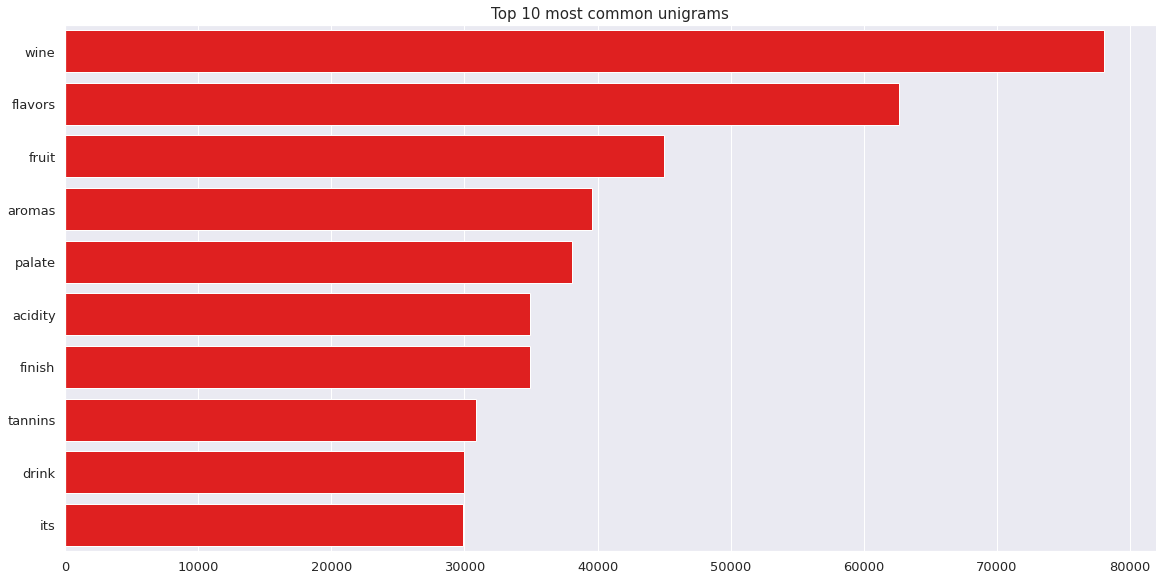

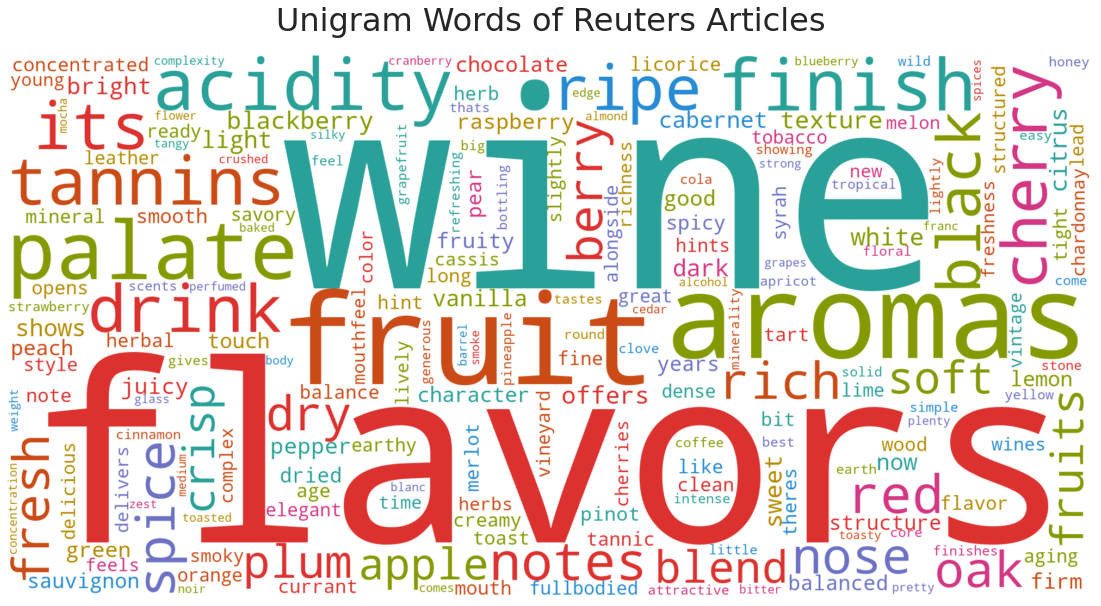

In [42]:
N=10

# bar graph Plot of top 10 common unigram
fig, axes = plt.subplots(figsize=(16, 8))
plt.tight_layout()
sns.barplot(y=unigrams_df[0].values[:N], x=unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams', fontsize=15)
plt.show()

# Plot word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4',
              '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)
fd = {
    'fontsize': '32',
    'fontweight' : 'normal',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}
wc = WordCloud(width=2000, height=1000, collocations=False,
               background_color="white",
               color_func=col_func,
               max_words=200,
               random_state=np.random.randint(1, 8)) .generate_from_frequencies(unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title('Unigram Words of Reuters Articles', pad=24, fontdict=fd)
plt.show()

In [43]:
import nltk

bigrams = defaultdict(int)
for description in processed_words:
    nltk_tokens = nltk.word_tokenize(description)
    bigrams_lists = list(nltk.bigrams(nltk_tokens))
    bigrams_lists = [' '.join(bi) for bi in bigrams_lists]
    for bigram in bigrams_lists:
        bigrams[bigram] += 1

In [44]:
bigrams_df = pd.DataFrame(sorted(bigrams.items(), key=lambda x: x[1])[::-1])
bigrams_df

,0,1
0,black cherry,7438
1,drink now,6578
2,fruit flavors,5798
3,cabernet sauvignon,5013
4,palate offers,4264
...,...,...
807139,underscoring flavors,1
807140,pineapple pokes,1
807141,unripened apple,1
807142,offering unripened,1


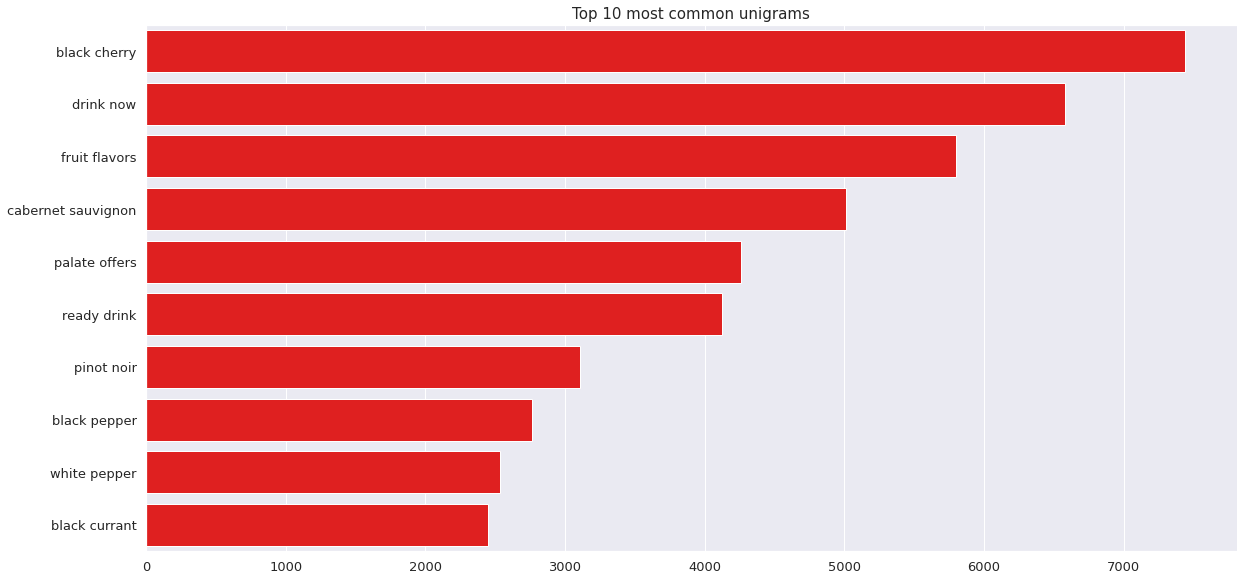

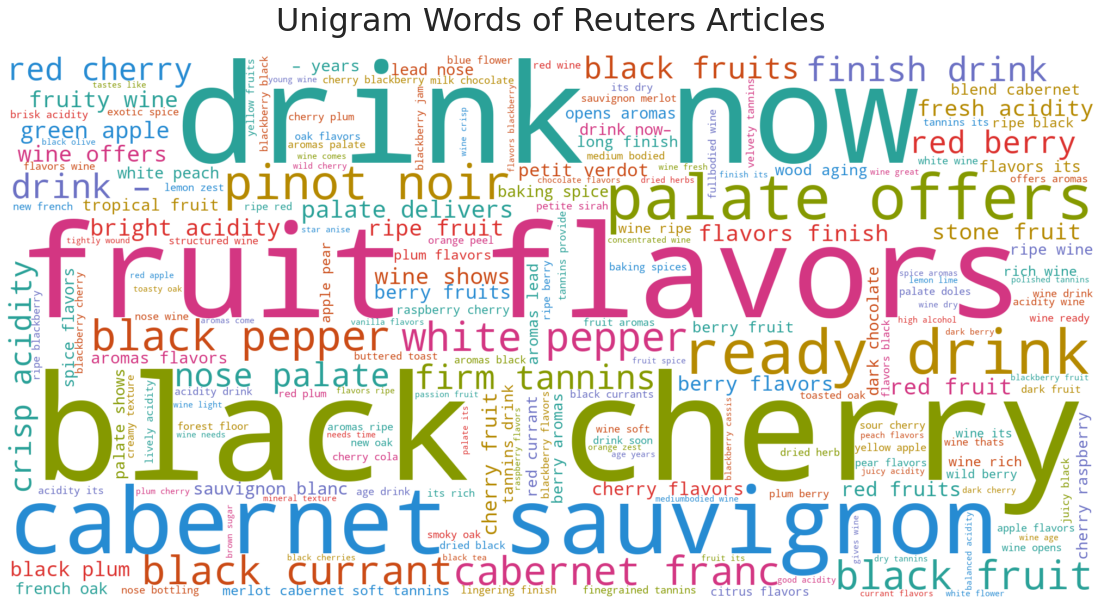

In [45]:
N=10

# bar graph Plot of top 10 common unigram
fig, axes = plt.subplots(figsize=(16, 8))
plt.tight_layout()
sns.barplot(y=bigrams_df[0].values[:N], x=bigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams', fontsize=15)
plt.show()

# Plot word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4',
              '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)
fd = {
    'fontsize': '32',
    'fontweight' : 'normal',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}
wc = WordCloud(width=2000, height=1000, collocations=False,
               background_color="white",
               color_func=col_func,
               max_words=200,
               random_state=np.random.randint(1, 8)) .generate_from_frequencies(bigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title('Unigram Words of Reuters Articles', pad=24, fontdict=fd)
plt.show()

# Conclusions

* England makes the best wine on average, but if you want a wine with perfect scores, look for the wine from countries such as US, France, Italy Portugal

* Price is related to quality. However we can still pay a little less to buy a good wine as the points difference between the wines are not very big

* All varieties of wine are fair game, but my bet;s on the Pinot Noir

* Flavours and aroma are the most common word appears in the description, which is reasonable as these words are usually used to describe a wine

* Fruits name appear quite common as well, since the wine are mostly made from fruits